# Building a neural network in Keras with Tensorflow #

### A walkthrough for the Stockholm Machine Learning Club

The goal is to demonstrate how to build a simple neural network using Keras, a popular open source neural network library.

This demonstration uses images of digits expressed in sign language, collected by Turkey Ankara Ayrancı Anadolu High School Students (https://www.kaggle.com/ardamavi/sign-language-digits-dataset)

## To follow along:
If you want to follow along on your own machine then please complete the setup steps below to install everything you need. You can get the data from my github repo (https://github.com/jo-gay/keras_demo) or the original from the Kaggle (link above). The data is in npy format which is easy to load using numpy.

### Setup steps:
The code given for each step assumes you are using <code>conda</code>. If not, you will need to adapt it!
#### Warning: Keras and Tensorflow have a lot of dependencies - it will take a while to install them all.
- Create new environment and activate it (e.g. <code>conda create -n keras_demo</code>; <code> conda activate keras_demo</code>)
- Install python and packages per requirements.txt (<code>conda install --file requirements.txt</code>)
- Install Jupyter Notebooks in the new environment (<code>conda install jupyter</code>)
- Set up Jupyter to use environments (<code>conda install nb_conda</code>)


TODO requirements.txt

- python
- tensorflow
- keras
- matplotlib
- numpy particular version 16.4.? to avoid TF warnings

In [1]:
import os
import numpy as np
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(202001)

In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
data_path = "./Sign-language-digits-dataset/"

In [4]:
X = np.load(os.path.join(data_path, 'X.npy'))
y = np.load(os.path.join(data_path, 'y.npy'))

In [5]:
samples, im_width, im_height = X.shape
_, num_classes = y.shape
print(f"Loaded {samples} images of size {im_width} x {im_height}, labelled with {num_classes} classes")

Loaded 2062 images of size 64 x 64, labelled with 10 classes


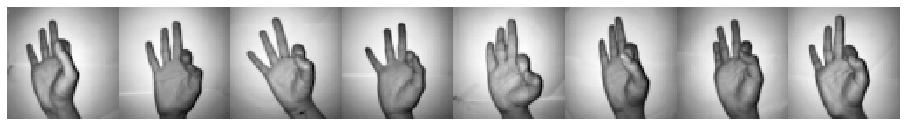

In [6]:
plt.figure(figsize=(16,6))
plt.imshow(np.hstack([X[i] for i in range(8)]), cmap='gray')
plt.axis('off');

<em> Note to self: order of data is not random! All these images are of the digit nine.</em>

<em> Also: class index does not correspond to digit being shown </em>

In [7]:
class_to_digit_map = {0:9, 1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2, 9:5}

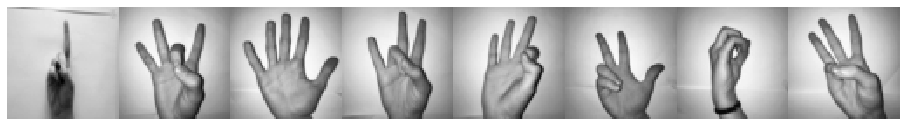

       1              8              5              7              9              3              0              6       


In [8]:
examples = np.random.choice(samples, 8)
plt.figure(figsize=(16,6))
plt.imshow(np.hstack([X[i] for i in examples]), cmap='gray')
plt.axis('off')
plt.show()
print(''.join(['{:^15d}'.format(class_to_digit_map[np.argmax(y[i])]) for i in examples]))

### Randomly select training, validation and test datasets

In [9]:
random_idxs = np.random.permutation(samples) # all the indices in a random order
m = int(samples * 0.6)
test_size = (samples - m) // 2
X_train, y_train = X[random_idxs[:m]], y[random_idxs[:m]]
X_validate, y_validate = X[random_idxs[m:(m + test_size)]], y[random_idxs[m:(m + test_size)]]
X_test, y_test = X[random_idxs[-test_size:]], y[random_idxs[-test_size:]]
# Check we have a reasonable number of examples of each class in each set
sum(y_train), sum(y_validate), sum(y_test)

(array([124., 127., 112., 123., 123., 113., 127., 130., 127., 131.]),
 array([40., 35., 56., 35., 43., 52., 33., 44., 40., 34.]),
 array([40., 43., 38., 49., 40., 43., 46., 32., 39., 42.]))

## Part 2: Build a neural network with Keras

Now that we have our training, validation and test sets, with the associated labels, we can train a neural network.

In [10]:
## Keras imports
from keras import models
from keras import layers
from keras import regularizers
from keras import callbacks

In [11]:
## Create the model and add some layers
model = models.Sequential()

# First (hidden) layer includes the dimension of the training feature vectors (N)
# The input layer is automatically added.
model.add(layers.Dense(32, input_dim=im_width*im_height, activation='relu'))

## Optional additional layers
# Standard fully connected layer
model.add(layers.Dense(32, activation='relu'))
# ... can add more layers here... see later.

# Output layer has 10 elements (one for each class, multi-class logistic regression) and uses softmax activation
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
## Compile the model, choosing optimizer, loss function (e.g. mean squared error for regression), 
#  and metrics that we want to keep track of.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                131104    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________


In [13]:
X_train_flattened = np.reshape(X_train, (-1, im_width*im_height))
X_validate_flattened = np.reshape(X_validate, (-1, im_width*im_height))

In [14]:
## Run the training process
model.fit(X_train_flattened, y_train, epochs=150, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
1237/1237 [==============================] - 0s 140us/step - loss: 2.3477 - accuracy: 0.0930
Epoch 2/150
1237/1237 [==============================] - 0s 47us/step - loss: 2.3026 - accuracy: 0.1027
Epoch 3/150
1237/1237 [==============================] - 0s 52us/step - loss: 2.3025 - accuracy: 0.1035
Epoch 4/150
1237/1237 [==============================] - 0s 52us/step - loss: 2.3023 - accuracy: 0.1059
Epoch 5/150
1237/1237 [==============================] - 0s 52us/step - loss: 2.3023 - accuracy: 0.1059
Epoch 6/150
1237/1237 [==============================] - 0s 54us/step - loss: 2.3022 - accuracy: 0.1059
Epoch 7/150
1237/1237 [==============================] - 0s 49us/step - loss: 2.3021 - accuracy: 0.1059
Epoch 8/150
1237/1237 [==============================] - 0s 52us/step - loss: 2.3020 - accuracy: 0.1059
Epoch 9/150
1237/1237 [==============================] - 0s 57us/step - loss: 2.3020 - accuracy: 0.1059
Epoch 10/150
12

1237/1237 [==============================] - 0s 47us/step - loss: 2.3014 - accuracy: 0.1059
Epoch 77/150
1237/1237 [==============================] - 0s 47us/step - loss: 2.3014 - accuracy: 0.1059
Epoch 78/150
1237/1237 [==============================] - 0s 46us/step - loss: 2.3014 - accuracy: 0.1059
Epoch 79/150
1237/1237 [==============================] - 0s 46us/step - loss: 2.3014 - accuracy: 0.1059
Epoch 80/150
1237/1237 [==============================] - 0s 45us/step - loss: 2.3014 - accuracy: 0.1059
Epoch 81/150
1237/1237 [==============================] - 0s 46us/step - loss: 2.3014 - accuracy: 0.1059
Epoch 82/150
1237/1237 [==============================] - 0s 44us/step - loss: 2.3014 - accuracy: 0.1059
Epoch 83/150
1237/1237 [==============================] - 0s 47us/step - loss: 2.3014 - accuracy: 0.1059
Epoch 84/150
1237/1237 [==============================] - 0s 44us/step - loss: 2.3014 - accuracy: 0.1059
Epoch 85/150
1237/1237 [==============================] - 0s 45us/st

In [15]:
model.evaluate(X_validate_flattened, y_validate)

412/412 [==============================] - 0s 85us/step


[2.311454384072313, 0.08252426981925964]

#### <i>Note: The outcome of the above training is highly variable depending on whether you got lucky with initial weights</i>

### Try slightly bigger model
We didn't get a very good accuracy level on the training data, so let's try adding more layers. Since we already seem to be slightly overfitting, let's also add some dropout layers

In [16]:
## Create the model and add some layers
model = models.Sequential()

# First (hidden) layer includes the dimension of the training feature vectors (N)
# The input layer is automatically added.
model.add(layers.Dense(128, input_dim=im_width*im_height, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))

# Output layer with one node for each output class
model.add(layers.Dense(num_classes, activation='softmax'))

In [17]:
## Compile the model, choosing optimizer, loss function (e.g. mean squared error for regression), 
#  and metrics that we want to keep track of.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [18]:
## Run the training process
model.fit(X_train_flattened, y_train, epochs=200, batch_size=128)

Epoch 1/200
1237/1237 [==============================] - 0s 291us/step - loss: 2.4038 - accuracy: 0.0970
Epoch 2/200
1237/1237 [==============================] - 0s 129us/step - loss: 2.3416 - accuracy: 0.1091
Epoch 3/200
1237/1237 [==============================] - 0s 130us/step - loss: 2.3116 - accuracy: 0.1221
Epoch 4/200
1237/1237 [==============================] - 0s 124us/step - loss: 2.3066 - accuracy: 0.1148
Epoch 5/200
1237/1237 [==============================] - 0s 129us/step - loss: 2.2871 - accuracy: 0.1326
Epoch 6/200
1237/1237 [==============================] - 0s 126us/step - loss: 2.2655 - accuracy: 0.1552
Epoch 7/200
1237/1237 [==============================] - 0s 124us/step - loss: 2.2080 - accuracy: 0.1795
Epoch 8/200
1237/1237 [==============================] - 0s 125us/step - loss: 2.1822 - accuracy: 0.1851
Epoch 9/200
1237/1237 [==============================] - 0s 127us/step - loss: 2.0759 - accuracy: 0.2328
Epoch 10/200
1237/1237 [==============================]

1237/1237 [==============================] - 0s 129us/step - loss: 0.5563 - accuracy: 0.8246
Epoch 79/200
1237/1237 [==============================] - 0s 129us/step - loss: 0.5560 - accuracy: 0.8036
Epoch 80/200
1237/1237 [==============================] - 0s 127us/step - loss: 0.5191 - accuracy: 0.8327
Epoch 81/200
1237/1237 [==============================] - 0s 125us/step - loss: 0.5613 - accuracy: 0.8108
Epoch 82/200
1237/1237 [==============================] - ETA: 0s - loss: 0.5374 - accuracy: 0.81 - 0s 129us/step - loss: 0.5278 - accuracy: 0.8205
Epoch 83/200
1237/1237 [==============================] - 0s 127us/step - loss: 0.5377 - accuracy: 0.8092
Epoch 84/200
1237/1237 [==============================] - 0s 128us/step - loss: 0.6202 - accuracy: 0.7720
Epoch 85/200
1237/1237 [==============================] - 0s 132us/step - loss: 0.5257 - accuracy: 0.8213
Epoch 86/200
1237/1237 [==============================] - 0s 125us/step - loss: 0.4886 - accuracy: 0.8367
Epoch 87/200
1237

1237/1237 [==============================] - 0s 128us/step - loss: 0.3191 - accuracy: 0.8884
Epoch 155/200
1237/1237 [==============================] - 0s 127us/step - loss: 0.3995 - accuracy: 0.8577
Epoch 156/200
1237/1237 [==============================] - 0s 126us/step - loss: 0.2959 - accuracy: 0.9038
Epoch 157/200
1237/1237 [==============================] - 0s 128us/step - loss: 0.4012 - accuracy: 0.8513
Epoch 158/200
1237/1237 [==============================] - 0s 131us/step - loss: 0.3611 - accuracy: 0.8747
Epoch 159/200
1237/1237 [==============================] - 0s 125us/step - loss: 0.3070 - accuracy: 0.8852
Epoch 160/200
1237/1237 [==============================] - 0s 131us/step - loss: 0.2550 - accuracy: 0.9159
Epoch 161/200
1237/1237 [==============================] - 0s 127us/step - loss: 0.2242 - accuracy: 0.9256
Epoch 162/200
1237/1237 [==============================] - 0s 125us/step - loss: 0.2374 - accuracy: 0.9224
Epoch 163/200
1237/1237 [==========================

In [19]:
model.evaluate(X_validate_flattened, y_validate, batch_size=128)

412/412 [==============================] - 0s 172us/step


[0.9058279886986446, 0.7985436916351318]

### Use a CNN instead
Also use the alternative 'functional' syntax

In [20]:
input_layer = layers.Input(shape=(im_width,im_height,1))
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu')(input_layer)
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu')(hidden_layers)
hidden_layers = layers.Flatten()(hidden_layers)
output_layer = layers.Dense(10, activation='softmax')(hidden_layers)
model = models.Model(inputs=input_layer, outputs=output_layer)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                576010    
Total params: 578,490
Trainable params: 578,490
Non-trainable params: 0
_________________________________________________________________


In [22]:
X_train_cnn = np.reshape(X_train, (-1, im_width, im_height, 1)) #'channels last' format for tensorflow image data
X_validate_cnn = np.reshape(X_validate, (-1, im_width, im_height, 1))
X_train_cnn.shape

(1237, 64, 64, 1)

In [23]:
## Run the training process
model.fit(X_train_cnn, y_train, epochs=30, batch_size=128)

Epoch 1/30
1237/1237 [==============================] - 4s 3ms/step - loss: 3.1102 - accuracy: 0.1302
Epoch 2/30
1237/1237 [==============================] - 4s 3ms/step - loss: 2.1854 - accuracy: 0.2433
Epoch 3/30
1237/1237 [==============================] - 4s 3ms/step - loss: 1.9901 - accuracy: 0.4462
Epoch 4/30
1237/1237 [==============================] - 4s 3ms/step - loss: 1.6370 - accuracy: 0.6467
Epoch 5/30
1237/1237 [==============================] - 4s 3ms/step - loss: 1.2063 - accuracy: 0.6726
Epoch 6/30
1237/1237 [==============================] - 4s 3ms/step - loss: 0.8792 - accuracy: 0.7397
Epoch 7/30
1237/1237 [==============================] - 4s 3ms/step - loss: 0.6715 - accuracy: 0.7995
Epoch 8/30
1237/1237 [==============================] - 4s 3ms/step - loss: 0.5292 - accuracy: 0.8407
Epoch 9/30
1237/1237 [==============================] - 4s 3ms/step - loss: 0.4319 - accuracy: 0.8779
Epoch 10/30
1237/1237 [==============================] - 4s 3ms/step - loss: 0.364

In [24]:
loss_and_metrics = model.evaluate(X_validate_cnn, y_validate, batch_size=128)
loss_and_metrics

412/412 [==============================] - 1s 1ms/step


[0.7279659324479335, 0.8155339956283569]

#### <i>Note: The results of the above training are very reliable. Unlike the fully connected network above, the cnn gets to 100% accuracy (on this dataset) every time </i>

### Add some regularization

In [25]:
input_layer = layers.Input(shape=(im_width,im_height,1))
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu')(input_layer)
hidden_layers = layers.Dropout(0.25)(hidden_layers)
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu')(hidden_layers)
hidden_layers = layers.Dropout(0.25)(hidden_layers)
hidden_layers = layers.Flatten()(hidden_layers)
output_layer = layers.Dense(10, activation='softmax')(hidden_layers)
model = models.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
dropout_3 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5760

In [26]:
model.fit(X_train_cnn, y_train, epochs=50, batch_size=128, validation_data=(X_validate_cnn, y_validate))

Train on 1237 samples, validate on 412 samples
Epoch 1/50
1237/1237 [==============================] - 7s 5ms/step - loss: 2.7852 - acc: 0.1164 - val_loss: 2.3234 - val_acc: 0.0801
Epoch 2/50
1237/1237 [==============================] - 6s 5ms/step - loss: 2.2957 - acc: 0.1164 - val_loss: 2.2871 - val_acc: 0.3908
Epoch 3/50
1237/1237 [==============================] - 7s 5ms/step - loss: 2.2451 - acc: 0.2247 - val_loss: 2.2018 - val_acc: 0.4248
Epoch 4/50
1237/1237 [==============================] - 6s 5ms/step - loss: 2.1575 - acc: 0.3557 - val_loss: 2.0812 - val_acc: 0.4733
Epoch 5/50
1237/1237 [==============================] - 6s 5ms/step - loss: 1.9561 - acc: 0.4745 - val_loss: 1.8746 - val_acc: 0.4733
Epoch 6/50
1237/1237 [==============================] - 6s 5ms/step - loss: 1.6327 - acc: 0.5521 - val_loss: 1.5585 - val_acc: 0.5243
Epoch 7/50
1237/1237 [==============================] - 6s 5ms/step - loss: 1.2903 - acc: 0.6112 - val_loss: 1.3247 - val_acc: 0.6044
Epoch 8/50
1237

### More regularization... and early stopping

In [27]:
input_layer = layers.Input(shape=(im_width,im_height,1))
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02))(input_layer)
hidden_layers = layers.Dropout(0.25)(hidden_layers)
hidden_layers = layers.Conv2D(16, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.02))(hidden_layers)
hidden_layers = layers.Dropout(0.25)(hidden_layers)
hidden_layers = layers.Flatten()(hidden_layers)
output_layer = layers.Dense(10, activation='softmax')(hidden_layers)
model = models.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 60, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5760

In [28]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train_cnn, y_train, epochs=150, batch_size=128, validation_data=(X_validate_cnn, y_validate), callbacks=[early_stopping])

Train on 1237 samples, validate on 412 samples
Epoch 1/150
1237/1237 [==============================] - 7s 5ms/step - loss: 3.6912 - acc: 0.0978 - val_loss: 2.7579 - val_acc: 0.0971
Epoch 2/150
1237/1237 [==============================] - 6s 5ms/step - loss: 2.6559 - acc: 0.0954 - val_loss: 2.5636 - val_acc: 0.1262
Epoch 3/150
1237/1237 [==============================] - 6s 5ms/step - loss: 2.5506 - acc: 0.1245 - val_loss: 2.5231 - val_acc: 0.1626
Epoch 4/150
1237/1237 [==============================] - 6s 5ms/step - loss: 2.4776 - acc: 0.2175 - val_loss: 2.4200 - val_acc: 0.4150
Epoch 5/150
1237/1237 [==============================] - 6s 5ms/step - loss: 2.3283 - acc: 0.4285 - val_loss: 2.2364 - val_acc: 0.4927
Epoch 6/150
1237/1237 [==============================] - 6s 5ms/step - loss: 2.0388 - acc: 0.5061 - val_loss: 1.8995 - val_acc: 0.5097
Epoch 7/150
1237/1237 [==============================] - 6s 5ms/step - loss: 1.6282 - acc: 0.6095 - val_loss: 1.5639 - val_acc: 0.6044
Epoch 8/

In [29]:
model.evaluate(X_validate_cnn, y_validate)

412/412 [==============================] - 1s 1ms/step: 


[0.8955264079917982, 0.7742718458175659]